<a href="https://colab.research.google.com/github/philosophynote/machine_learning/blob/main/chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os

# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

# domain = "openai.com" # <- put your domain to be crawled
domain = "alarmbox.co.jp"
# full_url = "https://openai.com/" # <- put your domain to be crawled with https or http
full_url = "https://alarmbox.co.jp"
openai.api_key = ""

# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # URLを配列に入れる
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

In [ ]:
# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    
    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        with urllib.request.urlopen(url) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []
            
            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

In [ ]:
# 指定されたURLから、同じドメイン内にあるハイパーリンクを取得するための関数
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))

In [ ]:
# サイトをクロールして本文内容をtextファイルとcsvファイルに保存する
def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        # Save text from the url to a <url>.txt file
        with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w", encoding="UTF-8") as f:

            # Get the text from the URL using BeautifulSoup
            soup = BeautifulSoup(requests.get(url).text, "html.parser")

            # Get the text but remove the tags
            text = soup.get_text()

            # If the crawler gets to a page that requires JavaScript, it will stop the crawl
            if ("You need to enable JavaScript to run this app." in text):
                print("Unable to parse page " + url + " due to JavaScript being required")
            
            # Otherwise, write the text to the file in the text directory
            f.write(text)

        # Get the hyperlinks from the URL and add them to the queue
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)

crawl(full_url)

https://alarmbox.co.jp
https://alarmbox.co.jp/category/allnews
https://alarmbox.co.jp/allnews/media/%e5%85%a8%e5%9b%bd%e8%b3%83%e8%b2%b8%e4%bd%8f%e5%ae%85%e6%96%b0%e8%81%9e%e3%81%ab%e6%8e%b2%e8%bc%89%e3%81%95%e3%82%8c%e3%81%be%e3%81%97%e3%81%9f
https://alarmbox.co.jp/2019/10
https://alarmbox.co.jp/news
HTTP Error 404: Not Found
https://alarmbox.co.jp/2019
https://alarmbox.co.jp/allnews/press/%e7%ac%ac%e4%b8%89%e8%80%85%e5%89%b2%e5%bd%93%e5%a2%97%e8%b3%87%e3%83%bb%e5%8d%97%e9%83%bd%e9%8a%80%e8%a1%8c%e3%81%a8%e3%81%ae%e4%ba%8b%e6%a5%ad%e6%8f%90%e6%90%ba
https://alarmbox.co.jp/wp-content/uploads/2018/04/press20180420.pdf
https://alarmbox.co.jp/allnews/information/2019gw
https://alarmbox.co.jp/2019/04
https://alarmbox.co.jp/2017/04
https://alarmbox.co.jp/2017
https://alarmbox.co.jp/allnews/information/20210614-seminar
https://alarmbox.co.jp/2019/09
https://alarmbox.co.jp/allnews/media/techcrunch%e3%81%ab%e6%8e%b2%e8%bc%89%e3%81%95%e3%82%8c%e3%81%be%e3%81%97%e3%81%9f
https://alarmbox.co.jp/

ConnectionError: ignored

In [ ]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [ ]:
text = "ユーザーID（Eメールアドレス）またはパスワードが異なっている可能性があります。"
# texts = [
#     "ユーザーID（Eメールアドレス）またはパスワードが異なっている可能性があります。入力に間違いがないかご確認のうえ、再度お試しください。パスワードがわからなくなった場合は、下記の『パスワードをお忘れの方』をクリックしていただき、次の画面でEメールアドレス、お名前をご入力いただければ、パスワード再設定画面へのリンクが記載された「パスワード再設定メール」をご登録のメールアドレスにお送りします。「パスワード再設定メール」に記載されたリンク先へアクセスし、新しいパスワードをご登録ください。
# ユーザーID（Eメールアドレス）がわからなくなった場合は、下記『再登録はこちら』をクリックして再登録画面に進み、会員情報を入力いただき、再登録をお願いします。
# ※再登録の場合でも、これまでの「割引/特典」・「購入履歴」は自動的に引き継がれます。"]

SyntaxError: ignored

In [ ]:
import pandas as pd

# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r", encoding="UTF-8") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

df = pd.DataFrame(texts, columns = ['fname', 'text'])

# fname'はクリーニングされたファイル名を含み、'text'は対応するファイルからクリーニングされたテキスト
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

<ipython-input-90-429202555403>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,.jp allnews press 20190918 iyo,.jp allnews press 20190918 iyo. 伊予銀行との事業提携とアラ...
1,.jp allnews press 211216 chosa01,.jp allnews press 211216 chosa01. インターネット上で悪評...
2,.jp allnews media %e6%97%a5%e6%9c%ac%e7%b5%8c%...,.jp allnews media %e6%97%a5%e6%9c%ac%e7%b5%8c%...
3,.jp allnews media 2209 media,.jp allnews media 2209 media. Yahoo！ニュース、ECzi...
4,.jp allnews information %e3%82%bb%e3%82%ad%e3%...,.jp allnews information %e3%82%bb%e3%82%ad%e3%...


In [ ]:
os.listdir("text/" + domain + "/")[0]

'alarmbox.co.jp_allnews_press_20190918-iyo.txt'

In [ ]:
with open("text/" + domain + "/" + file, "r", encoding="UTF-8") as f:
    text = f.read()
    print(file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''))
    print(text)
    # # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
    # texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

In [ ]:
import pandas as pd

# Create a list to store the text files
texts=["ユーザーID（Eメールアドレス）またはパスワードが異なっている可能性があります。 \
入力に間違いがないかご確認のうえ、再度お試しください。\
パスワードがわからなくなった場合は、\
下記の『パスワードをお忘れの方』をクリックしていただき、\
次の画面でEメールアドレス、お名前をご入力いただければ、\
パスワード再設定画面へのリンクが記載された「パスワード再設定メール」をご登録のメールアドレスにお送りします。\
「パスワード再設定メール」に記載されたリンク先へアクセスし、新しいパスワードをご登録ください。\
ユーザーID（Eメールアドレス）がわからなくなった場合は、下記『再登録はこちら』をクリックして再登録画面に進み、会員情報を入力いただき、再登録をお願いします。\
※再登録の場合でも、これまでの「割引/特典」・「購入履歴」は自動的に引き継がれます。"]

df = pd.DataFrame(texts, columns = ['text'])

df.to_csv('processed/scraped.csv')
df.head()

,text
0,ユーザーID（Eメールアドレス）またはパスワードが異なっている可能性があります。 入力に間違...


In [ ]:
df.head(20)

,fname,text
0,jp,jp . 404 Not Found Not Found The requested UR...
1,jp tickets tgs rule,jp tickets tgs rule. 利用規約 利用規約 株式会社ＥＶＥＮＴＩ...


<AxesSubplot:>

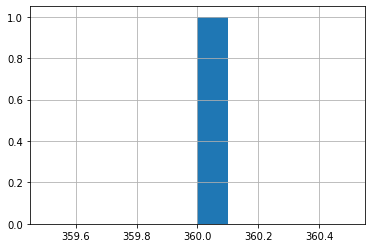

In [ ]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['text']

# テキストをトークン化した場合のトークン数を格納する
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [ ]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('。 ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append("。 ".join(chunk) + "。")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks
    

shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<AxesSubplot:>

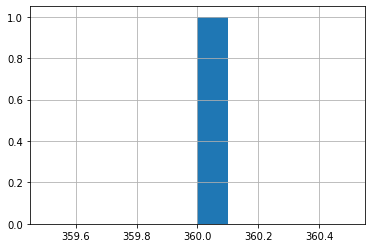

In [ ]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [ ]:
df_dropped  = df[df["n_tokens"] != 1]

In [ ]:
import openai
df_dropped = df_dropped.head(40)
df_dropped['embeddings'] = df_dropped.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])

df_dropped.to_csv('processed/embeddings.csv')
df_dropped.head()

<ipython-input-176-130b5429f3ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['embeddings'] = df_dropped.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])


,text,n_tokens,embeddings
0,ユーザーID（Eメールアドレス）またはパスワードが異なっている可能性があります。 入力に間違...,360,"[-0.01623065210878849, -0.010895517654716969, ..."


In [ ]:
import numpy as np
from openai.embeddings_utils import distances_from_embeddings

df=pd.read_csv('processed/embeddings.csv', index_col=0)
df = df.head(40)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,ユーザーID（Eメールアドレス）またはパスワードが異なっている可能性があります。 入力に間違...,360,"[-0.01623065210878849, -0.010895517654716969, ..."


In [ ]:
def create_context(
    question, df, max_len=1800, size="ada"
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        
        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4
        
        # If the context is too long, break
        if cur_len > max_len:
            break
        
        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

In [ ]:
def answer_question(
    df,
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

In [ ]:
# answer_question(df, question="アラームボックスとはどのような会社ですか？", debug=False)

answer_question(df, question="ユーザーIDがわかりません")

# answer_question(df, question="支払い方法は何が使えますか？")

'再登録画面に進み、会員情報を入力して再登録をお願いします。'

In [ ]:
df["text"][6]

'\xa0■調査背景 現代において、SNSやインターネット情報を参考に意思決定を行うことは一般的となりましたが、コロナ禍で非対面の商取引が習慣化したことにより、企業や商品に対するオンライン上の口コミや評判は、生活者にとって今まで以上に重要な情報源となりました。 急速にデジタル社会が発展する中、企業の持続的なビジネス成長には、オンライン上にある生活者のリアルな声を適切に収集し分析をするソーシャルリスニングや、自社の評判やブランドイメージを維持・向上させるためのレピュテーションマネジメントに取り組むことが必要不可欠な世の中となっています。 アラームボックスはこれまでAI与信管理クラウドサービス「アラームボックス」の提供を通して、膨大なネット上の口コミや情報を収集・解析をしてきました。これらの背景から、当社では、企業活動や与信管理において、これらの定性情報の重要性と活用法を啓発すべく、本調査の実施と発表に至りました。 ■悪評・クレームの業種別ランキング ※業種は総務省の日本標準産業分類を参考に区分けを行っています。'